# GPs in Julia
Script, without much function definitions, as in the book. Here is the first implementation in the most straight-forward way possible.

In [1]:
using LinearAlgebra
using Plots
using Measurements

GP definition:
- Mean function
- Kernel function and parameters
- Noise level

In [3]:
μ(x) = 0
σ_n = 0.25
#σ_n = 0
σ_f = 1
l = 1
k(x₁, x₂) = σ_f.^2 * exp.(-(x₁.-x₂').^2 ./ l.^2)

k (generic function with 1 method)

## Prior Distribution

In [6]:
x_test = [x for x in 0:0.01:10]

mean = μ.(x_test)
cov = k(x_test, x_test)

1001×1001 Array{Float64,2}:
 1.0          0.9999       0.9996       …  4.54326e-44  3.72008e-44
 0.9999       1.0          0.9999          5.54748e-44  4.54326e-44
 0.9996       0.9999       1.0             6.77232e-44  5.54748e-44
 0.9991       0.9996       0.9999          8.26595e-44  6.77232e-44
 0.998401     0.9991       0.9996          1.0087e-43   8.26595e-44
 0.997503     0.998401     0.9991       …  1.23067e-43  1.0087e-43 
 0.996406     0.997503     0.998401        1.50119e-43  1.23067e-43
 0.995112     0.996406     0.997503        1.83081e-43  1.50119e-43
 0.99362      0.995112     0.996406        2.23236e-43  1.83081e-43
 0.991933     0.99362      0.995112        2.72143e-43  2.23236e-43
 0.99005      0.991933     0.99362      …  3.31699e-43  2.72143e-43
 0.987973     0.99005      0.991933        4.04208e-43  3.31699e-43
 0.985703     0.987973     0.99005         4.92468e-43  4.04208e-43
 ⋮                                      ⋱               ⋮          
 3.31699e-43  4.0420

In [9]:
# Sample
cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
samples = mean .+ cov_chol.L * randn(length(mean), 5)

1001×5 Array{Float64,2}:
 0.413994   0.93488    1.27535  -1.01406     -1.48832
 0.404027   0.92623    1.26628  -1.00242     -1.51991
 0.395024   0.917382   1.25794  -0.990433    -1.55425
 0.384992   0.910695   1.24958  -0.979016    -1.58525
 0.375244   0.902785   1.23794  -0.966673    -1.61641
 0.364898   0.89336    1.22595  -0.953302    -1.64768
 0.354094   0.885639   1.21496  -0.939049    -1.68196
 0.342114   0.875822   1.20012  -0.92672     -1.71339
 0.331048   0.868207   1.18794  -0.910039    -1.74459
 0.322135   0.857208   1.17234  -0.895132    -1.77534
 0.307179   0.849022   1.15664  -0.884468    -1.80817
 0.299179   0.837188   1.14157  -0.868392    -1.84037
 0.286605   0.82502    1.12569  -0.854365    -1.87019
 ⋮                                                   
 0.884462  -1.9108    -1.38341   0.00806697   1.08874
 0.865739  -1.91818   -1.38299  -0.0030701    1.09185
 0.848476  -1.92379   -1.38685  -0.013496     1.09481
 0.832374  -1.92928   -1.39037  -0.0246095    1.09854
 0.

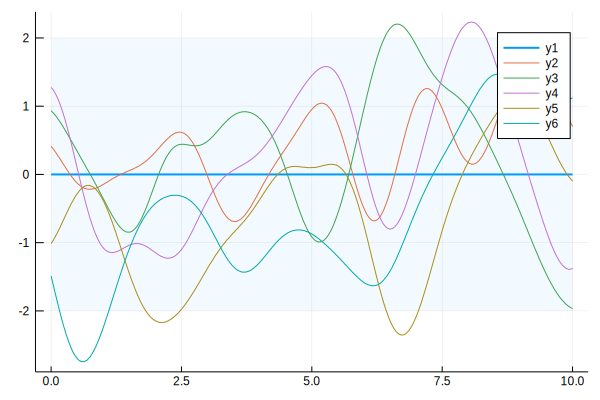

In [10]:
plot(x_test, mean, width=2, ribbon=2sqrt.(diag(cov)), fillalpha=0.05)
plot!(x_test, samples)

## Posterior Distribution

In [12]:
# Generate Data from some GP
n = 50
X = rand(n) * last(x_test)
mean, cov = μ.(X), k(X, X)
cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
f = mean .+ cov_chol.L * randn(length(mean))
y = f + randn(size(f)) * σ_n

50-element Array{Float64,1}:
 -0.6297472775087127  
  0.15116272648448326 
 -1.2372655274789934  
 -1.8101626823788424  
  0.23159490044353906 
 -1.1537485634929918  
  0.19278176763215554 
  0.7947704641707474  
 -0.9863346351021707  
  0.11677116169111551 
 -0.9986301195522722  
 -1.3439182178331437  
  0.022806489701244756
  ⋮                   
 -0.23961017951876845 
 -1.2369141858179629  
  0.12087384340543357 
 -1.2988513938402249  
 -1.431580428619555   
 -0.15655269893660387 
 -1.6175755253528574  
 -0.8372162552426299  
 -1.5733855293120151  
  0.7172291075814743  
  0.4816813802097532  
  0.5968628847629907  

In [13]:
K = k(X, X)
K_s = k(X, x_test)
K_ss = k(x_test, x_test)
K_inv = inv(K + σ_n^2 * I + 1e-6I)

cov = K_ss - K_s' * K_inv * K_s
mean = K_s' * K_inv * y

1001-element Array{Float64,1}:
 0.463182713134228  
 0.4586190790688708 
 0.4538649361930211 
 0.4489233074471354 
 0.4437974537937372 
 0.4384908733137028 
 0.4330072999313761 
 0.42735070176371465
 0.4215252790891999 
 0.41553546193286334
 0.4093859072643762 
 0.40308149580676905
 0.39662732845400545
 ⋮                  
 0.5276289618392849 
 0.533821335694562  
 0.5398540395779039 
 0.5457255491575725 
 0.5514343965110913 
 0.5569791718413776 
 0.5623585251665202 
 0.5675711679803486 
 0.572615874880929  
 0.5774914851641563 
 0.5821969043794757 
 0.5867311058449851 

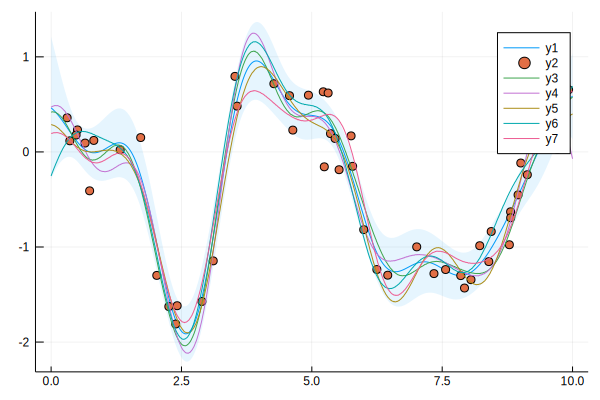

In [17]:
plot(x_test, mean, ribbon=2sqrt.(diag(cov)), fillalpha=0.1)
scatter!(X, y)

cov_chol = cholesky(Symmetric(cov) + 1e-6*I)
samples = mean .+ cov_chol.L * randn(length(mean), 5)
plot!(x_test, samples)